# DRL - Assignment2
## Train a Proximal Policy Optimization (PPO) algorithm on the SpaceInvadersNoFrameskip-v4 
### Yorick Juffer, Alejandro Sánchez Roncero


In [1]:
import gym
from stable_baselines3 import PPO
from stable_baselines3.common.vec_env import DummyVecEnv, VecFrameStack, VecTransposeImage
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.atari_wrappers import AtariWrapper 
from stable_baselines3.common.monitor import Monitor, ResultsWriter
from stable_baselines3.common.callbacks import EvalCallback, CheckpointCallback, StopTrainingOnNoModelImprovement

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Hyperparameters
env_id = 'SpaceInvadersNoFrameskip-v4'
model_id = "ppo_space_invaders"
paths = {'log': './logs/', 'monitor': './monitor/', 'model': './models/'}
case_id = "00"
total_timesteps = 1e4 # total number of timesteps
eval_freq = 5000 
n_eval_episodes = 10 # Number of evaluation episodes
frame_skip = 1
max_no_improvement_evals = 5


In [7]:
# Environment:
# - "rgb" -> observation_space=Box(0, 255, (width=210, height=160, channels=3), np.uint8)
# - frameskip=1
# - repeat_prob=0

# Create the environment
env = gym.make(env_id) # difficulty: 0, mode: 0, 6 discrete actions
env = Monitor(env, filename=(paths['monitor']+case_id))

# Resize to a square image: 84x84 by default
# Grayscale observation
# Clip reward to {-1, 0, 1}
env = AtariWrapper(env, frame_skip=frame_skip, action_repeat_probability=0.0) 
env = DummyVecEnv([lambda: env])  # The algorithms require a vectorized environment to run
env = VecFrameStack(env, n_stack=4)  # Stack 4 frames together, to give the agent a sense of motion
env = VecTransposeImage(env)  # Transpose the image to (color_channels, height, width)
env.metadata["render_fps"] = 30

In [8]:
# CNN is more suitable here since Atary games have image-bases observations
model = PPO("CnnPolicy", env, verbose=1)

Using cpu device


In [9]:
# Train the agent

stop_train_callback = StopTrainingOnNoModelImprovement(
     max_no_improvement_evals=max_no_improvement_evals, 
     min_evals=5, 
     verbose=1)

eval_callback = EvalCallback(env, 
                             best_model_save_path=(paths['model']+case_id), 
                             log_path=(paths['log']+case_id),
                             eval_freq=eval_freq,
                             deterministic=True, 
                             render=False,
                             callback_after_eval=stop_train_callback, 
                             verbose=1
                        )

model.learn(total_timesteps=total_timesteps, 
            callback=eval_callback,
            progress_bar=True
            )
model.save(model_id)

Output()

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 1.9e+03  |
|    ep_rew_mean     | 105      |
| time/              |          |
|    fps             | 403      |
|    iterations      | 1        |
|    time_elapsed    | 5        |
|    total_timesteps | 2048     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2e+03       |
|    ep_rew_mean          | 130         |
| time/                   |             |
|    fps                  | 143         |
|    iterations           | 2           |
|    time_elapsed         | 28          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.010175145 |
|    clip_fraction        | 0.0698      |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.78       |
|    explained_variance   | 0.0514      |
|    learning_rate        | 0.0003      |
|    loss                 | 0.0124      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.00876    |
|    value_loss           | 0.0162      |
-----------------------------------------


Eval num_timesteps=5000, episode_reward=198.00 +/- 156.00

Episode length: 2221.20 +/- 734.40

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 2.22e+03    |
|    mean_reward          | 198         |
| time/                   |             |
|    total_timesteps      | 5000        |
| train/                  |             |
|    approx_kl            | 0.021766283 |
|    clip_fraction        | 0.198       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.77       |
|    explained_variance   | 0.226       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0354     |
|    n_updates            | 20          |
|    policy_gradient_loss | -0.0192     |
|    value_loss           | 0.0158      |
-----------------------------------------


New best mean reward!

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2e+03    |
|    ep_rew_mean     | 130      |
| time/              |          |
|    fps             | 80       |
|    iterations      | 3        |
|    time_elapsed    | 76       |
|    total_timesteps | 6144     |
---------------------------------


-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.09e+03    |
|    ep_rew_mean          | 123         |
| time/                   |             |
|    fps                  | 82          |
|    iterations           | 4           |
|    time_elapsed         | 99          |
|    total_timesteps      | 8192        |
| train/                  |             |
|    approx_kl            | 0.022247951 |
|    clip_fraction        | 0.22        |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.76       |
|    explained_variance   | 0.177       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0439     |
|    n_updates            | 30          |
|    policy_gradient_loss | -0.0239     |
|    value_loss           | 0.0169      |
-----------------------------------------


Eval num_timesteps=10000, episode_reward=105.00 +/- 0.00

Episode length: 1972.00 +/- 0.00

-----------------------------------------
| eval/                   |             |
|    mean_ep_length       | 1.97e+03    |
|    mean_reward          | 105         |
| time/                   |             |
|    total_timesteps      | 10000       |
| train/                  |             |
|    approx_kl            | 0.020562118 |
|    clip_fraction        | 0.221       |
|    clip_range           | 0.2         |
|    entropy_loss         | -1.75       |
|    explained_variance   | 0.396       |
|    learning_rate        | 0.0003      |
|    loss                 | -0.0105     |
|    n_updates            | 40          |
|    policy_gradient_loss | -0.029      |
|    value_loss           | 0.013       |
-----------------------------------------


---------------------------------
| rollout/           |          |
|    ep_len_mean     | 2.26e+03 |
|    ep_rew_mean     | 145      |
| time/              |          |
|    fps             | 71       |
|    iterations      | 5        |
|    time_elapsed    | 143      |
|    total_timesteps | 10240    |
---------------------------------


In [10]:
# Evaluate model on n_eval_episodes and calculate the average and std reward
mean_r, std_r = evaluate_policy(model, env, 
                n_eval_episodes=n_eval_episodes,
                deterministic=True,
                return_episode_rewards=False,
                render=False)
print("Evaluation reward: (Avg, Std) -> ({:.2f}, {:.2f})".format(mean_r, std_r))

Evaluation reward: (Avg, Std) -> (147.00, 111.00)


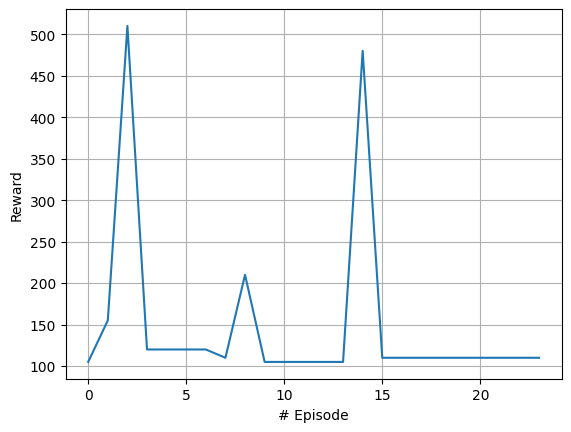

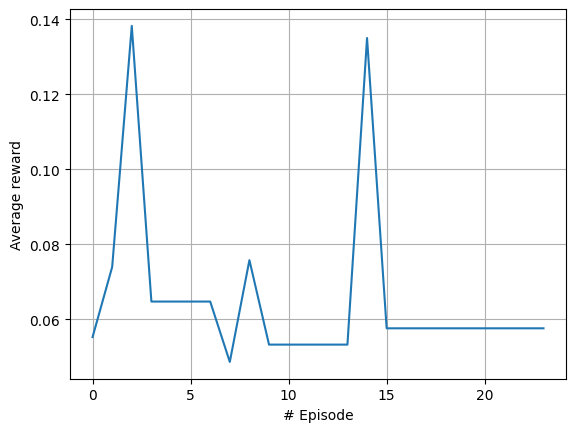

In [11]:
# Plot the average reward per episode

csv = pd.read_csv("{}{}.monitor.csv".format(paths["monitor"], case_id), sep=",", header=1)

plt.plot(np.array(csv["r"]))
plt.xlabel("# Episode")
plt.ylabel("Reward")
plt.grid()
plt.show()

plt.plot(np.array(csv["r"]) / np.array(csv["l"]))
plt.xlabel("# Episode")
plt.ylabel("Average reward")
plt.grid()



In [ ]:
# Cell 6
# Define the hyperparameters grid
hyperparams_grid = {
    'n_steps': [128, 256, 512, 1024],
    'learning_rate': [0.0001, 0.001, 0.01]
}

# Conduct the grid search
best_mean_reward = -float('inf')
best_hyperparams = None

for n_steps in hyperparams_grid['n_steps']:
    for learning_rate in hyperparams_grid['learning_rate']:
        print(f"Training with n_steps={n_steps}, learning_rate={learning_rate}")
        model = PPO("CnnPolicy", env, verbose=0, n_steps=n_steps, learning_rate=learning_rate)
        model.learn(total_timesteps=...)
        mean_reward, _ = evaluate_policy(model, env, n_eval_episodes=10)
        if mean_reward > best_mean_reward:
            best_mean_reward = mean_reward
            best_hyperparams = {'n_steps': n_steps, 'learning_rate': learning_rate}

print(f"Best mean reward: {best_mean_reward}, Best hyperparams: {best_hyperparams}")
